In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [2]:
# Locate and load the data file
df = pd.read_csv('D:\\CHAKSHU\\AAEN.705.601.82.AppliedML\\Data\\titanic.train.csv')
print(f'N rows={len(df)}, M columns={len(df.columns)}')
df.dtypes

N rows=891, M columns=12


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
testdf = pd.read_csv('D:\\CHAKSHU\\AAEN.705.601.82.AppliedML\\Data\\titanic.test.csv')
print(f'N rows={len(testdf)}, M columns={len(testdf.columns)}')
testdf.dtypes

N rows=418, M columns=11


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("Train Set")
df.isnull().any()

Train Set


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
# Check unique levels and see any marker is used for a missing level
for col in df.columns:
        print(col, df[col].unique())
        
#if df[col].dtype == object:

PassengerId [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [7]:
display(df[df["Age"].isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


About 20% of Age column is Nan. Probably, we can impute using mean.

In [8]:
display(df[df["Cabin"].isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


More than 75% of Cabin column is NaN. Insufficient data - Decision to drop that column.

In [9]:
display(df[df["Embarked"].isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Where a person embarks from might not have any direct relevance to his/her survival. Plus this column might need one-hot-encoding to be included in the training set. However, there is a possibility of people coming from different regions to have different levels of 'fight' for survival, e.g. people from cities might have a higher zeal compared to towns. So, this might have some indirect relevance, hence I'll explore this column for now.

In [10]:
display(df["Embarked"].value_counts(dropna=False))

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [11]:
#Imputing assuming the mean would be for category 'S' for column Embark
df["Embarked"] = df["Embarked"].fillna('S')

#Confirmation
display(df[df["Embarked"].isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [12]:
#Imputing Age column using column mean

age_mean = df['Age'].mean()
age_mean = round(age_mean, 2)

df['Age'] = df['Age'].fillna(age_mean)

#Confirmation
display(df[df['Age'].isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [13]:
#Dropping Cabin column

df = df.drop(['Cabin'],axis=1)

#Confirmation
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
#Checking duplicates

df["isDuplicate"] = df.duplicated()

print(f'Number of duplicates: {len(df[df["isDuplicate"]==True])}')

Number of duplicates: 0


The passenger ID is a unique ID alloted to individuals. It is as good as having serial numbers in a dataset. Names of individuals having significance in determining survival is unheard of. Also, the ticket column might have correlation with the Pclass column or Fare column. And nevertheless, it will be difficult to convert it to int64 because the ordinality is not provided. So, dropping those columns and isDuplicate column. 

In [15]:
df = df.drop(labels = ["isDuplicate", "Ticket", "Name", "PassengerId"], axis = 1)

#Confirmation
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
#Checking class imbalance

display(df['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64

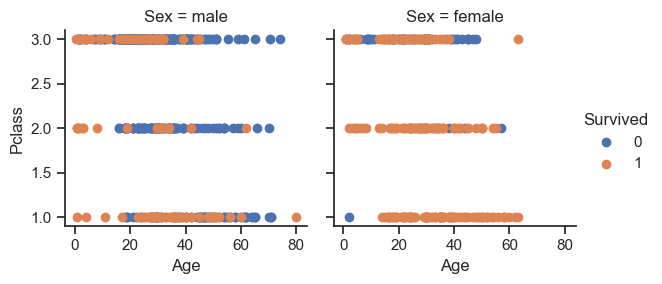

In [17]:
# Plot for data exploration
g = sns.FacetGrid(df, col='Sex', hue='Survived')
g.map(plt.scatter, 'Age', 'Pclass')
g.add_legend();

In [18]:
#Finding min, max
minval = df['Age'].min()
maxval = df['Age'].max()
print(f'Min Age: {minval}')
print(f'Max Age: {maxval}')

Min Age: 0.42
Max Age: 80.0


In [19]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,29.7,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [20]:
#Converting age to classes of numbers as per age range

filter1 = (df['Age'] <= 20.0)
filter2 = (df['Age'] > 20.0)
filter3 = (df['Age'] <= 40.0)
filter4 = (df['Age'] > 40.0)
filter5 = (df['Age'] <= 60.0)
filter6 = (df['Age'] > 60.0)

df['Age'] = np.where(filter1, 10.0, df['Age'])
df['Age'] = np.where(filter2 & filter3, 30.0, df['Age'])
df['Age'] = np.where(filter4 & filter5, 50.0, df['Age'])
df['Age'] = np.where(filter6, 70.0, df['Age'])

In [21]:
#Confirmation

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,30.0,1,0,7.2500,S
1,1,1,female,30.0,1,0,71.2833,C
2,1,3,female,30.0,0,0,7.9250,S
3,1,1,female,30.0,1,0,53.1000,S
4,0,3,male,30.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,30.0,0,0,13.0000,S
887,1,1,female,10.0,0,0,30.0000,S
888,0,3,female,30.0,1,2,23.4500,S
889,1,1,male,30.0,0,0,30.0000,C


In [22]:
print(f'Min Fare: {(df["Fare"].min())}')
print(f'Max Fare: {(df["Fare"].max())}')

Min Fare: 0.0
Max Fare: 512.3292


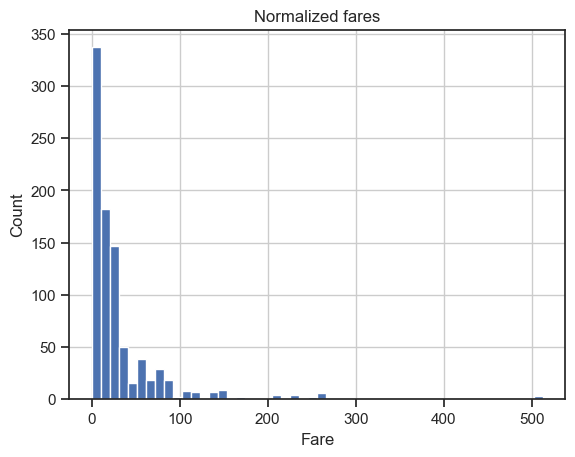

In [23]:
#Plot fares

df['Fare'].hist(bins=50)
plt.title('Normalized fares'); plt.xlabel('Fare'); plt.ylabel('Count')
plt.show()

In [24]:
#Finding indexes of fare more than 300 to check for errors

err_indx = df[df['Fare'] > 300].index
print(err_indx)

Int64Index([258, 679, 737], dtype='int64')


In [25]:
max_fare_indx = df[df['Fare']==512.3292].index
print(max_fare_indx)

Int64Index([258, 679, 737], dtype='int64')


In [26]:
##Converting fares as per ranges of fare

filter1 = (df['Fare'] <= 104.0)
filter2 = (df['Fare'] > 104.0)
filter3 = (df['Fare'] <= 156.0)
filter4 = (df['Fare'] > 156.0)
filter5 = (df['Fare'] <= 208.0)
filter6 = (df['Fare'] > 208.0)
filter7 = (df['Fare'] <= 260.0)
filter8 = (df['Fare'] > 260.0)
filter9 = (df['Fare'] <= 312.0)
filter10 = (df['Fare'] > 312.0)
filter11 = (df['Fare'] <= 364.0)
filter12 = (df['Fare'] > 364.0)
filter13 = (df['Fare'] <= 416.0)
filter14 = (df['Fare'] > 416.0)
filter15 = (df['Fare'] <= 468.0)
filter16 = (df['Fare'] > 468.0)
filter17 = (df['Fare'] <= 520.0)

df['Fare'] = np.where(filter1, 52.0, df['Fare'])
df['Fare'] = np.where(filter2 & filter3, 130.0, df['Fare'])
df['Fare'] = np.where(filter4 & filter5, 182.0, df['Fare'])
df['Fare'] = np.where(filter6 & filter7, 234.0, df['Fare'])
df['Fare'] = np.where(filter8 & filter9, 286.0, df['Fare'])
df['Fare'] = np.where(filter10 & filter11, 338.0, df['Fare'])
df['Fare'] = np.where(filter12 & filter13, 390.0, df['Fare'])
df['Fare'] = np.where(filter14 & filter15, 442.0, df['Fare'])
df['Fare'] = np.where(filter16 & filter17, 494.0, df['Fare'])        #Incase this is an error, using the highest value fare


In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,30.0,1,0,52.0,S
1,1,1,female,30.0,1,0,52.0,C
2,1,3,female,30.0,0,0,52.0,S
3,1,1,female,30.0,1,0,52.0,S
4,0,3,male,30.0,0,0,52.0,S


In [28]:
#Verifying maximum fare value
for i in max_fare_indx:
    display(df.loc[[i]])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,30.0,0,0,494.0,C


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
679,1,1,male,30.0,0,1,494.0,C


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
737,1,1,male,30.0,0,0,494.0,C


In [29]:
#One-hot-encode Embark column

df2 = pd.get_dummies(df['Embarked'], prefix='', prefix_sep='').groupby(level=0, axis=1).max().add_prefix('Embarked'+' - ')
df = pd.concat([df, df2], axis=1)
df = df.drop(['Embarked'], axis=1)

In [30]:
#Confirmation
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked - C,Embarked - Q,Embarked - S
0,0,3,male,30.0,1,0,52.0,0,0,1
1,1,1,female,30.0,1,0,52.0,1,0,0
2,1,3,female,30.0,0,0,52.0,0,0,1
3,1,1,female,30.0,1,0,52.0,0,0,1
4,0,3,male,30.0,0,0,52.0,0,0,1
5,0,3,male,30.0,0,0,52.0,0,1,0
6,0,1,male,50.0,0,0,52.0,0,0,1
7,0,3,male,10.0,3,1,52.0,0,0,1
8,1,3,female,30.0,0,2,52.0,0,0,1
9,1,2,female,10.0,1,0,52.0,1,0,0


In [31]:
df = df.replace({'Sex': {'male':0, 'female':1}})

#Confirmation
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked - C,Embarked - Q,Embarked - S
0,0,3,0,30.0,1,0,52.0,0,0,1
1,1,1,1,30.0,1,0,52.0,1,0,0
2,1,3,1,30.0,0,0,52.0,0,0,1
3,1,1,1,30.0,1,0,52.0,0,0,1
4,0,3,0,30.0,0,0,52.0,0,0,1


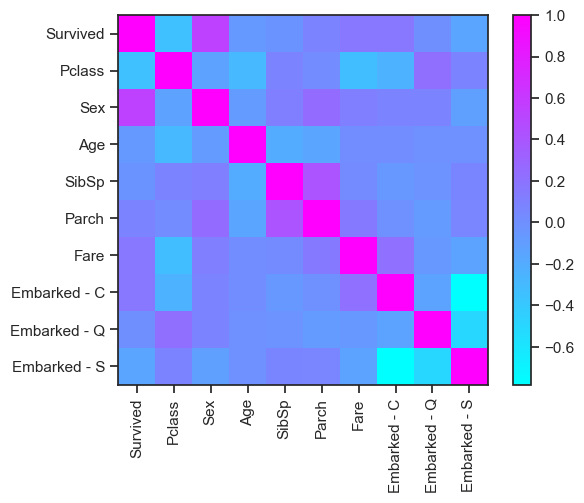

In [32]:
#Correlation matrix

cor = df.corr()

plt.imshow(cor, cmap='cool', interpolation='nearest')
plt.yticks(np.arange(len(df.columns)), labels=df.columns)
plt.xticks(np.arange(len(df.columns)), labels=df.columns, rotation=90)
plt.colorbar()
plt.show()

Pclass and Sex show highest correlation with Survived compared to other features of X. SibSp and Parch show a distinct correlation with each other as well which is not desired. Thus, we may consider to take those columns out later on depending on the performace of models.

In [33]:
#Creating X and y

X = df.loc[:, df.columns != "Survived"].values
y = df.loc[:, df.columns == "Survived"].values.ravel()

In [34]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def eval_classifier(_clf, _X, _y, _niter, text=''):
    accs = []
    kf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
    for train_index, test_index in kf.split(_X, _y):
        model = _clf.fit(_X[train_index], _y[train_index])
        y_pred = _clf.predict(_X[test_index])
        accs += [accuracy_score(_y[test_index], y_pred)]

    print(f'{text:>20s} Stratified 10-fold CV acc={np.mean(accs):.3f} with {_niter} iterations')


eval_classifier(GaussianNB(), X, y, 10, 'GaussianNB')
eval_classifier(SVC(class_weight='balanced', kernel='linear', C=2), X, y, 10, 'SVM (linear)')
eval_classifier(SVC(class_weight='balanced', kernel='rbf', gamma=2, C=2), X, y, 10, 'SVM (rbf)')
eval_classifier(RandomForestClassifier(n_jobs=8, n_estimators=300,
                                       max_depth=10, random_state=None, class_weight='balanced'), X, y, 10, 'Random Forest')
eval_classifier(LogisticRegression(solver='lbfgs', max_iter =300, class_weight='balanced'), X, y, 10, 'Logistic Regression')

          GaussianNB Stratified 10-fold CV acc=0.788 with 10 iterations
        SVM (linear) Stratified 10-fold CV acc=0.784 with 10 iterations
           SVM (rbf) Stratified 10-fold CV acc=0.767 with 10 iterations
       Random Forest Stratified 10-fold CV acc=0.787 with 10 iterations


C:\Users\parth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\parth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

 Logistic Regression Stratified 10-fold CV acc=0.778 with 10 iterations
CPU times: total: 36.1 s
Wall time: 36.3 s


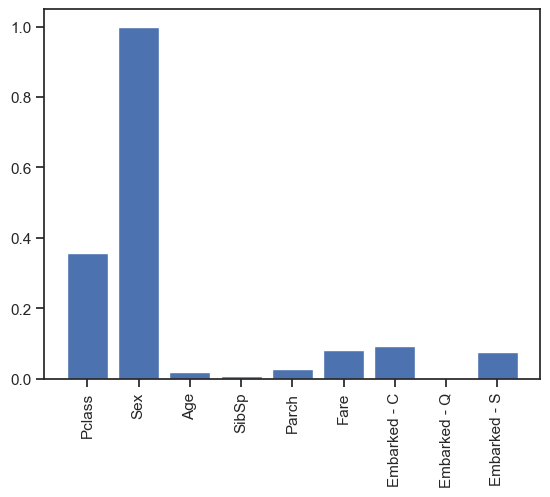

In [35]:
#Plot for checking features

from sklearn.feature_selection import SelectPercentile, f_classif


selector = SelectPercentile(f_classif, percentile=10)
# Fit the data
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

# Display
cols = list(df.loc[:, df.columns != 'Survived'].columns.values)
y_pos = np.arange(len(cols))
plt.bar(y_pos, scores)
plt.xticks(y_pos, cols, rotation=90)
plt.show()

In [36]:
#Removing SibSp, Parch, Age columns
df2 = df.drop(labels =['Age', 'SibSp', 'Parch'], axis = 1)

X1 = df2.loc[:, df2.columns != "Survived"].values

In [37]:
eval_classifier(GaussianNB(), X1, y, 10, 'GaussianNB')
eval_classifier(SVC(kernel='linear', C=2, gamma=0.1), X1, y, 10, 'SVM (linear)')
eval_classifier(SVC(class_weight='balanced', kernel='rbf', gamma=0.1, C=2), X1, y, 10, 'SVM (rbf)')
eval_classifier(RandomForestClassifier(n_jobs=8, n_estimators=300,
                                       max_depth=10, random_state=16), X1, y, 10, 'Random Forest')
eval_classifier(LogisticRegression(solver='lbfgs', max_iter =300), X1, y, 10, 'Logistic Regression')

          GaussianNB Stratified 10-fold CV acc=0.795 with 10 iterations
        SVM (linear) Stratified 10-fold CV acc=0.787 with 10 iterations
           SVM (rbf) Stratified 10-fold CV acc=0.769 with 10 iterations
       Random Forest Stratified 10-fold CV acc=0.813 with 10 iterations
 Logistic Regression Stratified 10-fold CV acc=0.769 with 10 iterations


In [38]:
#Removing Embarked columns
df3 = df2.drop(labels =['Embarked - C', 'Embarked - Q', 'Embarked - S'], axis = 1)

X2 = df3.loc[:, df3.columns != "Survived"].values

In [39]:
eval_classifier(GaussianNB(), X2, y, 10, 'GaussianNB')
eval_classifier(SVC(kernel='linear', C=2, gamma=0.1), X2, y, 10, 'SVM (linear)')
eval_classifier(SVC(class_weight='balanced', kernel='rbf', gamma=0.1, C=2), X2, y, 10, 'SVM (rbf)')
eval_classifier(RandomForestClassifier(n_jobs=8, n_estimators=50,
                                       max_depth=10, random_state=None), X2, y, 10, 'Random Forest')
eval_classifier(LogisticRegression(solver='lbfgs', max_iter =300), X2, y, 10, 'Logistic Regression')


          GaussianNB Stratified 10-fold CV acc=0.781 with 10 iterations
        SVM (linear) Stratified 10-fold CV acc=0.787 with 10 iterations
           SVM (rbf) Stratified 10-fold CV acc=0.781 with 10 iterations
       Random Forest Stratified 10-fold CV acc=0.773 with 10 iterations
 Logistic Regression Stratified 10-fold CV acc=0.782 with 10 iterations


In [40]:
#Pre-Processing test dataset

In [41]:
#Check test set and perform same operations as above wherever required
print("Test Set")
testdf.isnull().any()

Test Set


PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [42]:
display(testdf[testdf['Age'].isnull()])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [43]:
#Just checking Cabin column as well before dropping

display(testdf[testdf['Cabin'].isnull()])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [44]:
display(testdf[testdf['Fare'].isnull()])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [45]:
#Imputing Fare and Age with mean, dropping Cabin
#Assuming this is real-world data, it requires finding mean separately for the test dataset

testMeanAge = testdf['Age'].mean()
testMeanAge = round(testMeanAge, 2)
print(testMeanAge)

testdf['Age'] = testdf['Age'].fillna(testMeanAge)

#Confirmation

display(testdf[testdf['Age'].isnull()])

30.27


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [46]:
testMeanFare = testdf['Fare'].mean()
testMeanFare = round(testMeanFare, 2)
print(testMeanFare)

testdf['Fare'] = testdf['Fare'].fillna(testMeanFare)

#Confirmation

display(testdf[testdf['Fare'].isnull()])

35.63


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [47]:
passenger_id = pd.DataFrame(testdf['PassengerId'])

testdf = testdf.drop(labels = ["Ticket", "Name", "Cabin", "Embarked", "Age", "SibSp", "PassengerId", "Parch"], axis = 1)

#Confirmation
testdf.head()

,Pclass,Sex,Fare
0,3,male,7.8292
1,3,female,7.0000
2,2,male,9.6875
3,3,male,8.6625
4,3,female,12.2875


In [48]:
testdf['Fare'].min()

0.0

In [49]:
testdf['Fare'].max()

512.3292

In [50]:
#Converting fares as per ranges of fare

filter1 = (testdf['Fare'] <= 104.0)
filter2 = (testdf['Fare'] > 104.0)
filter3 = (testdf['Fare'] <= 156.0)
filter4 = (testdf['Fare'] > 156.0)
filter5 = (testdf['Fare'] <= 208.0)
filter6 = (testdf['Fare'] > 208.0)
filter7 = (testdf['Fare'] <= 260.0)
filter8 = (testdf['Fare'] > 260.0)
filter9 = (testdf['Fare'] <= 312.0)
filter10 = (testdf['Fare'] <= 312.0)
filter10 = (testdf['Fare'] <= 312.0)
filter10 = (testdf['Fare'] <= 312.0)
filter10 = (testdf['Fare'] <= 312.0)
filter10 = (testdf['Fare'] <= 312.0)
filter10 = (testdf['Fare'] <= 312.0)
filter16 = (testdf['Fare'] > 468.0)
filter17 = (testdf['Fare'] <= 520.0)

testdf['Fare'] = np.where(filter1, 52.0, testdf['Fare'])
testdf['Fare'] = np.where(filter2 & filter3, 130.0, testdf['Fare'])
testdf['Fare'] = np.where(filter4 & filter5, 182.0, testdf['Fare'])
testdf['Fare'] = np.where(filter6 & filter7, 234.0, testdf['Fare'])
testdf['Fare'] = np.where(filter8 & filter9, 286.0, testdf['Fare'])
testdf['Fare'] = np.where(filter16 & filter17, 286.0, testdf['Fare']) 

In [51]:
testdf = testdf.replace({'Sex': {'male':0, 'female':1}})

#Confirmation
testdf.head()

,Pclass,Sex,Fare
0,3,0,52.0
1,3,1,52.0
2,2,0,52.0
3,3,0,52.0
4,3,1,52.0


In [52]:
#Fitting entire dataset for finding

def eval_classifier(_clf, _X, _y, test):
        model = _clf.fit(_X, _y)
        y_pred = _clf.predict(test)
        return y_pred
y_pred = eval_classifier(SVC(kernel='linear', C=2, gamma=0.1), X2, y, testdf)

C:\Users\parth\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [53]:
testdf = pd.concat([testdf, passenger_id], axis = 1)

testdf.head()

,Pclass,Sex,Fare,PassengerId
0,3,0,52.0,892
1,3,1,52.0,893
2,2,0,52.0,894
3,3,0,52.0,895
4,3,1,52.0,896


In [54]:
def save_preds(_fn, _y_pred, _df):
    import csv
    with open(_fn, 'w') as fout:
        writer = csv.writer(fout, delimiter=',', lineterminator='\n')
        writer.writerow(['Survived', 'PassengerId'])
        for y, passengerId in zip(_y_pred, _df['PassengerId']):
            writer.writerow([y, passengerId])
            
save_preds('predictions_chakshu.csv', y_pred, testdf)

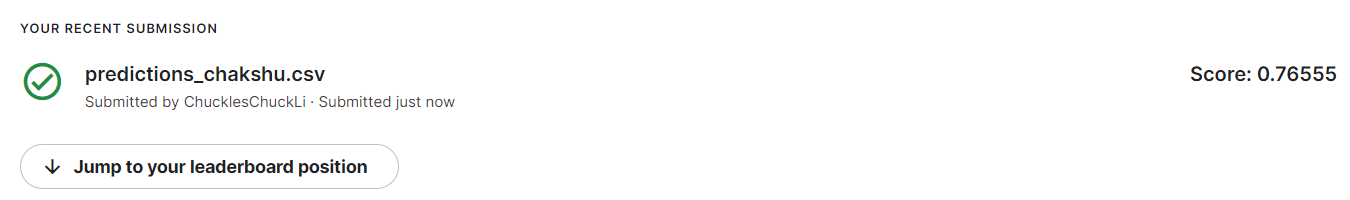